# Getting started with pandas

In [1]:
from pandas import Series, DataFrame
import pandas as pd

In [2]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

In [227]:
%pwd

'/Users/miyamoto/Projects/sample/pydata-book'

## Introduction to pandas data structures

### Series

In [228]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [229]:
print(obj[0])
print(obj.values)
print(type(obj.values))
print(obj.index)

4
[ 4  7 -5  3]
<class 'numpy.ndarray'>
RangeIndex(start=0, stop=4, step=1)


In [230]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [231]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [232]:
obj2['a']

-5

In [233]:
obj2['d'] = 6
print(obj2[['c', 'a', 'd']])

c    3
a   -5
d    6
dtype: int64


In [234]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [235]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [236]:
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [237]:
'b' in obj2

True

In [238]:
'e' in obj2

False

In [239]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [240]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [241]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [242]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [243]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [244]:
obj3

Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64

In [245]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [246]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [247]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [248]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### DataFrame

In [249]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)

In [250]:
frame

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002


In [251]:
DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [252]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt', 'debt2'],
                   index=['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,debt,debt2
one,2000,Ohio,1.5,NaN,NaN
two,2001,Ohio,1.7,NaN,NaN
three,2002,Ohio,3.6,NaN,NaN
four,2001,Nevada,2.4,NaN,NaN
five,2002,Nevada,2.9,NaN,NaN


In [253]:
frame2.columns

Index(['year', 'state', 'pop', 'debt', 'debt2'], dtype='object')

In [254]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [255]:
frame2.year
frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [256]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
debt2     NaN
Name: three, dtype: object

In [257]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt,debt2
one,2000,Ohio,1.5,16.5,NaN
two,2001,Ohio,1.7,16.5,NaN
three,2002,Ohio,3.6,16.5,NaN
four,2001,Nevada,2.4,16.5,NaN
five,2002,Nevada,2.9,16.5,NaN


In [258]:
# for i in 1..5::
#     print(i)
print(len(np.arange(5.)))
for a in np.arange(5.):
    print(a)
frame2['debt'] = np.arange(0,len(np.arange(5.)))
frame2

5
0.0
1.0
2.0
3.0
4.0


,year,state,pop,debt,debt2
one,2000,Ohio,1.5,0,NaN
two,2001,Ohio,1.7,1,NaN
three,2002,Ohio,3.6,2,NaN
four,2001,Nevada,2.4,3,NaN
five,2002,Nevada,2.9,4,NaN


In [259]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt,debt2
one,2000,Ohio,1.5,NaN,NaN
two,2001,Ohio,1.7,-1.2,NaN
three,2002,Ohio,3.6,NaN,NaN
four,2001,Nevada,2.4,-1.5,NaN
five,2002,Nevada,2.9,-1.7,NaN


In [260]:

print(frame2.state == 'Ohio')
frame2['eastern'] = frame2.state == 'Ohio'
frame2

one       True
two       True
three     True
four     False
five     False
Name: state, dtype: bool


,year,state,pop,debt,debt2,eastern
one,2000,Ohio,1.5,NaN,NaN,True
two,2001,Ohio,1.7,-1.2,NaN,True
three,2002,Ohio,3.6,NaN,NaN,True
four,2001,Nevada,2.4,-1.5,NaN,False
five,2002,Nevada,2.9,-1.7,NaN,False


In [261]:
del frame2['eastern']
frame2.columns

Index(['year', 'state', 'pop', 'debt', 'debt2'], dtype='object')

In [262]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
print(type(pop))
# ?pop

<class 'dict'>


In [263]:
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [264]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [265]:
DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [266]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
DataFrame(pdata)

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7


In [267]:
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [268]:
frame3.values

array([[ nan,  1.5],
       [ 2.4,  1.7],
       [ 2.9,  3.6]])

In [269]:
frame2.values

array([[2000, 'Ohio', 1.5, nan, nan],
       [2001, 'Ohio', 1.7, -1.2, nan],
       [2002, 'Ohio', 3.6, nan, nan],
       [2001, 'Nevada', 2.4, -1.5, nan],
       [2002, 'Nevada', 2.9, -1.7, nan]], dtype=object)

### Index objects

In [270]:
obj = Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index
print(type(index))

<class 'pandas.core.indexes.base.Index'>


In [271]:
index[1:]

Index(['b', 'c'], dtype='object')

In [272]:
# index[1] = 'd'

In [273]:
index = pd.Index(np.arange(3))
obj2 = Series([1.5, -2.5, 0], index=index)
print(obj2.index)
print(index)
obj2.index is index

Int64Index([0, 1, 2], dtype='int64')
Int64Index([0, 1, 2], dtype='int64')


True

In [274]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [275]:
'Ohio' in frame3.columns

True

In [276]:
2003 in frame3.index

False

## Essential functionality

### Reindexing

In [277]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [278]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [279]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

a   -5.3
b    7.2
c    3.6
d    4.5
e    0.0
dtype: float64

In [280]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [281]:
print(np.arange(9).reshape((3, 3)))
print(np.arange(9).reshape((3, 3)).shape)
frame = DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],
                  columns=['Ohio', 'Texas', 'California'])
frame

[[0 1 2]
 [3 4 5]
 [6 7 8]]
(3, 3)


,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [282]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [283]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [284]:
# frame.reindex(index=['a', 'b', 'c', 'd'], method='ffill',
#               columns=states)

In [285]:
frame.loc[['a', 'b', 'c', 'd'], states]

,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


### Dropping entries from an axis

In [286]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [287]:
print(obj.drop(['d', 'c']))

print(obj)

a    0.0
b    1.0
e    4.0
dtype: float64
a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64


In [288]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [289]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [290]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [291]:
data.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


### Indexing, selection, and filtering

In [292]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj['b']

1.0

In [293]:
obj[1]

1.0

In [294]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [295]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [296]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [297]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [298]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [299]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [300]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [301]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [302]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [303]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [304]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [305]:
print(data < 5)
print((data < 5).shape)

            one    two  three   four
Ohio       True   True   True   True
Colorado   True  False  False  False
Utah      False  False  False  False
New York  False  False  False  False
(4, 4)


In [306]:
data[data < 5] = 0

In [307]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [308]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int64

In [309]:
data.ix[['Colorado', 'Utah'], [3, 0, 1]]

/Users/miyamoto/.pyenv/versions/miniconda3-4.0.5/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [310]:
data.ix[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int64

In [311]:
data.ix[:'Utah', 'two']

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int64

In [312]:
data.ix[data.three > 5, :3]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


### Arithmetic and data alignment

In [313]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [314]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [315]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [316]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [317]:
# print(list('abcd'))

df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                index=['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [318]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [319]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


#### Arithmetic methods with fill values

In [320]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [321]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [322]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [323]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [324]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


#### Operations between DataFrame and Series

In [325]:
arr = np.arange(12.).reshape((3, 4))
arr

array([[  0.,   1.,   2.,   3.],
       [  4.,   5.,   6.,   7.],
       [  8.,   9.,  10.,  11.]])

In [326]:
arr[0]

array([ 0.,  1.,  2.,  3.])

In [327]:
arr - arr[0]

array([[ 0.,  0.,  0.,  0.],
       [ 4.,  4.,  4.,  4.],
       [ 8.,  8.,  8.,  8.]])

In [328]:
frame = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
frame
# print(len(frame.iloc[0]))

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [329]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [330]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [331]:
series2 = Series(range(3), index=['b', 'e', 'f'])
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [332]:
series3 = frame['d']
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [333]:
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [334]:
frame.sub(series3, axis=0)

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### Function application and mapping

In [335]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [336]:
frame

,b,d,e
Utah,-0.204708,0.478943,-0.519439
Ohio,-0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,-1.296221


In [337]:
np.abs(frame)

,b,d,e
Utah,0.204708,0.478943,0.519439
Ohio,0.555730,1.965781,1.393406
Texas,0.092908,0.281746,0.769023
Oregon,1.246435,1.007189,1.296221


In [338]:
f = lambda x: x.max() - x.min()

In [339]:
frame.apply(f, axis=0)

b    1.802165
d    1.684034
e    2.689627
dtype: float64

In [340]:
frame.apply(f, axis=1)

Utah      0.998382
Ohio      2.521511
Texas     0.676115
Oregon    2.542656
dtype: float64

In [341]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-0.555730,0.281746,-1.296221
max,1.246435,1.965781,1.393406


In [342]:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.20,0.48,-0.52
Ohio,-0.56,1.97,1.39
Texas,0.09,0.28,0.77
Oregon,1.25,1.01,-1.30


In [343]:
print(type(frame['e']))
frame['e'].map(format)

<class 'pandas.core.series.Series'>


Utah      -0.52
Ohio       1.39
Texas      0.77
Oregon    -1.30
Name: e, dtype: object

### Sorting and ranking

In [344]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [345]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [346]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [347]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [348]:
obj = Series([4, 7, -3, 2])
# obj.order()

In [349]:
obj = Series([4, np.nan, 7, np.nan, -3, 2])
# obj.order()

In [350]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,a,b
0,0,4
1,1,7
2,0,-3
3,1,2


In [351]:
frame.sort_values(by='b')

,a,b
2,0,-3
3,1,2
0,0,4
1,1,7


In [352]:
frame.sort_values(by=['a', 'b'])

,a,b
2,0,-3
0,0,4
3,1,2
1,1,7


In [353]:
obj = Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [354]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [355]:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [356]:
frame = DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                   'c': [-2, 5, 8, -2.5]})
frame

,a,b,c
0,0,4.3,-2.0
1,1,7.0,5.0
2,0,-3.0,8.0
3,1,2.0,-2.5


In [357]:
frame.rank(axis=1)

,a,b,c
0,2.0,3.0,1.0
1,1.0,3.0,2.0
2,2.0,1.0,3.0
3,2.0,3.0,1.0


### Axis indexes with duplicate values

In [358]:
obj = Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [359]:
obj.index.is_unique

False

In [360]:
obj['a']

a    0
a    1
dtype: int64

In [361]:
obj['c']

4

In [362]:
df = DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,0.274992,0.228913,1.352917
a,0.886429,-2.001637,-0.371843
b,1.669025,-0.438570,-0.539741
b,0.476985,3.248944,-1.021228


In [363]:
df.loc['b']

,0,1,2
b,1.669025,-0.438570,-0.539741
b,0.476985,3.248944,-1.021228


## Summarizing and computing descriptive statistics

In [364]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],
                [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [365]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [366]:
df.sum(axis=1)

a    1.40
b    2.60
c     NaN
d   -0.55
dtype: float64

In [367]:
df.mean(axis=1, skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [368]:
df.idxmax()

one    b
two    d
dtype: object

In [369]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [370]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [371]:
print(len(['a', 'a', 'b', 'c'] * 4))
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

16


count     16
unique     3
top        a
freq       8
dtype: object

### Correlation and covariance

In [372]:
# import pandas.io.data as web

# all_data = {}
# for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']:
#     all_data[ticker] = web.get_data_yahoo(ticker)

# price = DataFrame({tic: data['Adj Close']
#                    for tic, data in all_data.iteritems()})
# volume = DataFrame({tic: data['Volume']
#                     for tic, data in all_data.iteritems()})

In [373]:
# returns = price.pct_change()
# returns.tail()

In [374]:
returns.MSFT.corr(returns.IBM)

NameError: name 'returns' is not defined

In [ ]:
returns.MSFT.cov(returns.IBM)

In [ ]:
returns.corr()

In [ ]:
returns.cov()

In [ ]:
returns.corrwith(returns.IBM)

In [ ]:
returns.corrwith(volume)

### Unique values, value counts, and membership

In [ ]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [ ]:
uniques = obj.unique()
uniques

In [ ]:
obj.value_counts()

In [ ]:
pd.value_counts(obj.values, sort=False)

In [ ]:
print(obj)
mask = obj.isin(['b', 'c'])
print(mask)

In [ ]:
obj[mask]

In [ ]:
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
                  'Qu2': [2, 3, 1, 2, 3],
                  'Qu3': [1, 5, 2, 4, 4]})
data

In [ ]:
print(pd.value_counts)
print(data.apply(pd.value_counts))
result = data.apply(pd.value_counts).fillna(0)
result

## Handling missing data

In [ ]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

In [ ]:
string_data.isnull()

In [ ]:
string_data[0] = None
string_data.isnull()

### Filtering out missing data

In [ ]:
from numpy import nan as NA
data = Series([1, NA, 3.5, NA, 7])
data.dropna()

In [ ]:
data[data.notnull()]

In [ ]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],
                  [NA, NA, NA], [NA, 6.5, 3.]])
print(data)
cleaned = data.dropna()
print(cleaned)

In [ ]:
cleaned

In [ ]:
data.dropna(how='all')

In [ ]:
data[4] = NA
data

In [ ]:
data.dropna(axis=1, how='all')

In [ ]:
df = DataFrame(np.random.randn(7, 3))
df.loc[:4, 1] = NA; df.loc[:2, 2] = NA
df

In [ ]:
df.dropna(thresh=2) #最低有効な列数

### Filling in missing data

In [ ]:
df.fillna(0)

In [ ]:
df.fillna({1: 0.3, 2: -1})

In [ ]:
# always returns a reference to the filled object
_ = df.fillna(0, inplace=True)
df

In [ ]:
df = DataFrame(np.random.randn(6, 3))
df.loc[2:, 1] = NA; df.loc[4:, 2] = NA
df

In [ ]:
df.fillna(method='ffill')

In [ ]:
df.fillna(method='ffill', limit=2)

In [ ]:
data = Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

## Hierarchical indexing ★ここから

In [ ]:
data = Series(np.random.randn(10),
              index=[['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'd', 'd'],
                     [1, 2, 3, 1, 2, 3, 1, 2, 2, 3]])
data

In [ ]:
print(type(data.index))
MultiIndex = data.index

In [ ]:
#部分的インデックス参照
data['c']

In [ ]:
data['a':'c']

In [ ]:
data.loc[['b', 'd']]

In [ ]:
data[:, 1]

In [ ]:
data.unstack()

In [ ]:
data.unstack().stack()

In [ ]:
frame = DataFrame(np.arange(12).reshape((4, 3)),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=[['Ohio', 'Ohio', 'Colorado'],
                           ['Green', 'Red', 'Green']])
frame

In [ ]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

In [ ]:
frame['Ohio']

In [ ]:
MultiIndex.from_arrays([['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']],
                       names=['state', 'color'])

### Reordering and sorting levels

In [ ]:
frame.swaplevel('key1', 'key2')

In [ ]:
frame.sortlevel(0) #key1

In [ ]:
frame.sortlevel(1) #key2

In [ ]:
frame.swaplevel(0, 1).swaplevel(0, 1).swaplevel(0, 1).sortlevel(0) #key2

### Summary statistics by level

In [ ]:
frame.sum(level='key2')

In [ ]:
frame.sum(level='color', axis=1)

### Using a DataFrame's columns

In [217]:
frame = DataFrame({'a': range(7), 'b': range(7, 0, -1),
                   'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                   'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [92]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [93]:
frame.set_index(['c', 'd'], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [94]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## Other pandas topics

### Integer indexing

In [375]:
ser = Series(np.arange(3.))
ser.iloc[-1]

2.0

In [96]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [97]:
ser2 = Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

In [99]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [100]:
ser3 = Series(range(3), index=[-5, 1, 3])
ser3.iloc[2]

2

In [101]:
frame = DataFrame(np.arange(6).reshape((3, 2)), index=[2, 0, 1])
frame.iloc[0]

0    0
1    1
Name: 2, dtype: int64

### Panel data

In [103]:
# import pandas.io.data as web

# pdata = pd.Panel(dict((stk, web.get_data_yahoo(stk))
#                        for stk in ['AAPL', 'GOOG', 'MSFT', 'DELL']))

In [104]:
# pdata

In [105]:
# pdata = pdata.swapaxes('items', 'minor')
# pdata['Adj Close']

In [106]:
# pdata.ix[:, '6/1/2012', :]

In [107]:
# pdata.ix['Adj Close', '5/22/2012':, :]

In [108]:
# stacked = pdata.ix[:, '5/30/2012':, :].to_frame()
# stacked

In [109]:
# stacked.to_panel()

In [128]:
import pandas as pd, pylab

In [140]:
#Full dimensions of a slice of our panel
index = ['1','2','3','4'] #major_index
columns = ['a','b','c'] #minor_index

df = pd.DataFrame(pylab.randn(4,3),columns=columns,index=index) #A full slice of the panel
df2 = pd.DataFrame(pylab.randn(3,2),columns=['a','c'],index=['1','3','4']) #A partial slice
df3 = pd.DataFrame(pylab.randn(2,2),columns=['a','b'],index=['2','4']) #Another partial slice
df4 = pd.DataFrame(pylab.randn(2,2),columns=['d','e'],index=['5','6']) #Partial slice with a new column and index
pn = pd.Panel({'A': df})
pn['B'] = df2
pn['C'] = df3
pn['D'] = df4

for key in pn.items:
    print(pn[key])


          a         b         c
1 -0.350109  0.217957 -0.894813
2 -1.741494 -1.052256  1.436603
3 -0.576207 -2.420294 -1.062330
4  0.237372  0.000957  0.065253
          a   b         c
1 -1.367524 NaN -0.030280
2       NaN NaN       NaN
3  0.940489 NaN -0.642437
4  1.040179 NaN -1.082922
          a         b   c
1       NaN       NaN NaN
2  0.429214 -0.236224 NaN
3       NaN       NaN NaN
4  0.641818 -0.331661 NaN
    a   b   c
1 NaN NaN NaN
2 NaN NaN NaN
3 NaN NaN NaN
4 NaN NaN NaN


# プラスα

In [18]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)
frame.cov()

,pop,year
pop,0.747,0.645
year,0.645,0.700


In [54]:
from sklearn import datasets
import scipy
import matplotlib.pyplot as pl
iris = datasets.load_iris()
frame = DataFrame(iris.data)
frame.head(5)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
target = pd.Series(iris.target)
target.head(5)

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [56]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [65]:
print(iris.data.shape)
data = iris.data[:,2:4]
print(data.shape)
data[:5]

(150, 4)
(150, 2)


array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2]])

In [67]:
np.mean(data, axis=0) #平均

array([ 3.7587,  1.1987])

In [69]:
np.cov(data, rowvar=0) #共分散行列

array([[ 3.1132,  1.2964],
       [ 1.2964,  0.5824]])

In [71]:
df = DataFrame(data) #共分散行列
df.cov()

,0,1
0,3.113179,1.296387
1,1.296387,0.582414


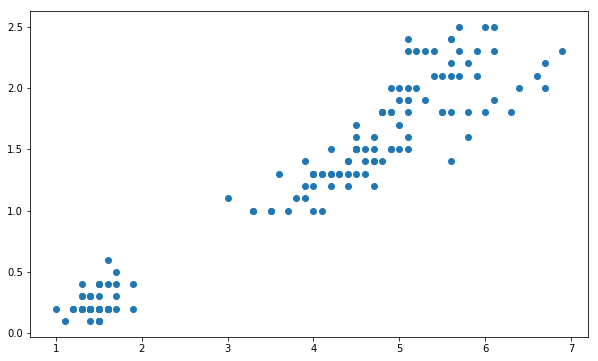

In [60]:
iris = datasets.load_iris()
data = iris.data[:, 2:4]

pl.scatter(data[:,0], data[:,1])
pl.show()

In [ ]:
iris = datasets.load_iris()
data = iris.data[:, 2:4]

pl.scatter(data[:,0], data[:,1])
pl.show()

# リスト内包表記

In [112]:
comprehension_3 = [ i if i%2==0 else str(i) for i in range(10)]
comprehension_3
#なにこれ。。。ってなる
#参考記事
#http://qiita.com/y__sama/items/a2c458de97c4aa5a98e7

[0, '1', 2, '3', 4, '5', 6, '7', 8, '9']

In [113]:
#通常
extension_1 = []
for i in range(10):
    extension_1.append(i)
extension_1

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [117]:
#リストを内包表記で生成
comprehension_1= [i for i in range(10)]
comprehension_1 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [118]:
#ifを含む場合(後置if)
extension_2 =[]
for i in range(10):
    if i%2==0:
        extension_2.append(i)
extension_2

[0, 2, 4, 6, 8]

In [119]:
comprehension_2 = [i for i in range(10) if i%2==0]
comprehension_2

[0, 2, 4, 6, 8]

In [120]:
#if ~ elseを含む場合 (条件演算子)
extension_3 =[]
for i in range(10):
    if i%2==0:
        extension_3.append(i)
    else:
        extension_3.append(str(i))
extension_3

[0, '1', 2, '3', 4, '5', 6, '7', 8, '9']

In [379]:
comprehension_3 = [ i if i%2==0 else str(i) for i in range(10)]
comprehension_3

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# hinton　レッスン１

In [52]:
import numpy as np
x = np.array([2,-1,1])
w = np.array([1,-0.5,0])
b = 0.5
y = np.dot(x, w) + b
t = 1
print(y)
#loss
1/2 * np.square(y-t)

3.0


2.0